In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#ROOT MEAN SQUARED (raiz da MÉDIA QUADRÁTICA)
def RMS(x,y):
    x= np.array(x)
    y= np.array(y)
    RMS = round(np.sqrt(np.sum(((y-x)/y)**2)/len(x)),2) #len(x) define o invervalo do array.
    return RMS

In [3]:
#x = [1,1]
#y = [1,1]
#N = 2
#RMS(x,y)

In [5]:
#corpo negro
df1 = pd.read_csv('NGC_40_BB_HDEN.csv', delimiter =' ')
#df1 = df1.drop([12,13],axis = 0) #optei por retirar essa linha para que os pontos fiquem mais próximos
#df1.reset_index(drop=True, inplace=True)
df1.head(3)

,Element,Line[A],ALLER_1972(I/I(Hbet),FERREIRA_2010(I/I(Hbet),Pottasch_2003(I/I(Hbet),Pottasch_2003(I/I(Hbet)_corrected,hden_40,hden_42,hden_44
0,[SII],4068.00,2.7,0.73,6.8,3.93,12.71,18.32,25.31
1,[SII],4076.00,0.900,0.73,2.1,1.21,4.11,5.93,8.18
2,H_delta,4101.73,-,22.43,42.4,24.51,25.65,25.75,25.82


In [6]:
#plano paralelo
df2 = pd.read_csv('NGC_40_PP_HDEN.csv', delimiter =' ')
#df2 = df2.drop([12,13],axis = 0) #optei por retirar essa linha para que os pontos fiquem mais próximos
#df2.reset_index(drop=True, inplace=True)

In [7]:
#WR
df3 = pd.read_csv('NGC_40_WR_HDEN.csv', delimiter =' ')
#df2 = df2.drop([12,13],axis = 0) #optei por retirar essa linha para que os pontos fiquem mais próximos
#df2.reset_index(drop=True, inplace=True)

In [8]:
#definindo variáveis para o calculo de rms e MSD p/ bb 73kK
obs1 = df1.iloc[:,5]
bb_hden_40 = df1.iloc[:,6].astype(float)
bb_hden_42 = df1.iloc[:,7].astype(float)
bb_hden_44 = df1.iloc[:,8].astype(float)

In [9]:
#definindo variáveis para o calculo de rms e MSD p/ pp 73kK
obs1 = df2.iloc[:,5]
pp_hden_40 = df2.iloc[:,6].astype(float)
pp_hden_42 = df2.iloc[:,7].astype(float)
pp_hden_44 = df2.iloc[:,8].astype(float)

In [10]:
#definindo variáveis para o calculo de rms e MSD p/ wr 73kK
obs1 = df3.iloc[:,5]
wr_hden_40 = df3.iloc[:,6].astype(float)
wr_hden_42 = df3.iloc[:,7].astype(float)
wr_hden_44 = df3.iloc[:,8].astype(float)

In [11]:
#calculando RMS p/ atmosfera bb T= 73kK
RMS_bb_73 = [RMS(bb_hden_40,obs1),RMS(bb_hden_42,obs1),RMS(bb_hden_44,obs1)]
                   
print(RMS_bb_73)

[7.05, 5.3, 4.07]


In [12]:
#calculando RMS p/ atmosfera pp T= 73kK
RMS_pp_73 = [RMS(pp_hden_40,obs1),RMS(pp_hden_42,obs1),RMS(pp_hden_44,obs1)]
print(RMS_pp_73)

[9.74, 7.27, 5.38]


In [13]:
#calculando RMS p/ atmosfera pp T= 73kK
RMS_wr_73 = [RMS(wr_hden_40,obs1),RMS(wr_hden_42,obs1),RMS(wr_hden_44,obs1)]
print(RMS_wr_73)

[1.8, 1.74, 2.03]


In [17]:
# Atmosfera corpo negro
x = df1.iloc[:,1]
y1 = (bb_hden_40-obs1)/obs1
y2 = (bb_hden_42-obs1)/obs1
y3 = (bb_hden_44-obs1)/obs1

In [18]:
# Atmosfera plano paralelo
x = df1.iloc[:,1]
z1 = (pp_hden_40-obs1)/obs1
z2 = (pp_hden_42-obs1)/obs1
z3 = (pp_hden_44-obs1)/obs1

In [19]:
# Atmosfera WR
x = df1.iloc[:,1]
w1 = (wr_hden_40-obs1)/obs1
w2 = (wr_hden_42-obs1)/obs1
w3 = (wr_hden_44-obs1)/obs1

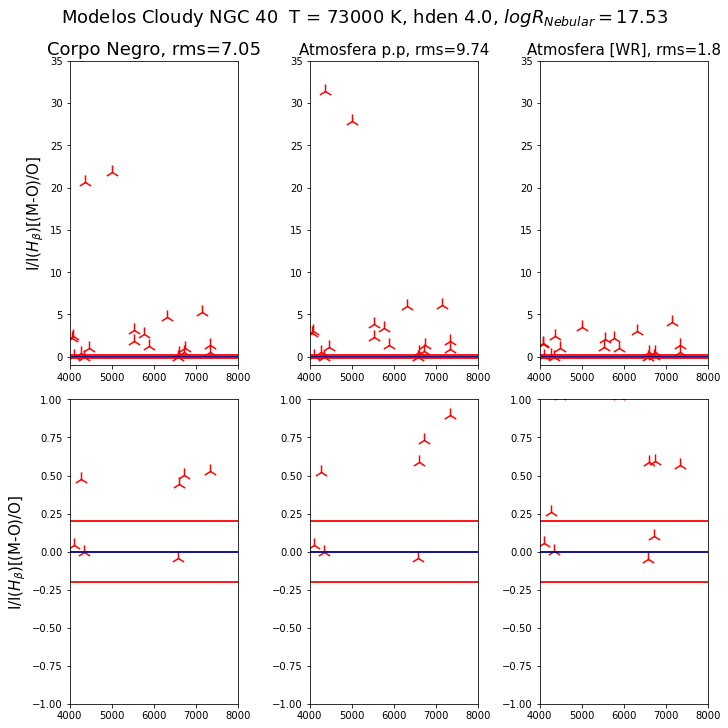

In [27]:
fig, ((ax1,ax2,ax3),(ax4,ax5,ax6)) = plt.subplots(2, 3,figsize=(10,10),constrained_layout=True)
fig.suptitle('Modelos Cloudy NGC 40  T = 73000 K, hden 4.0, $logR_{Nebular} = 17.53$', fontsize=18, color='black')
#gráfico 1

#parte superior 
ax1.scatter(x,y1,marker=('2'), color= 'red',s =200)
ax2.scatter(x,z1,marker=('2'), color= 'red',s=200)
ax3.scatter(x,w1,marker=('2'), color= 'red',s=200)
#------------------------------------------------------------
ax1.set_ylabel('I/I($H_{\u03B2}$)[(M-O)/O]', fontsize = 15)
ax1.set_title('Corpo Negro, rms=7.05', fontsize = 18) #título
ax1.axhline(y=0, color='darkblue', linewidth= 1.8)# linha horizontal
ax1.axhline(y=0.2, color='red', linewidth= 1.8)# linha horizontal
ax1.axhline(y=-0.2, color='red', linewidth= 1.8)# linha horizontal
#---------------------------------------------------------------
ax2.set_title('Atmosfera p.p, rms=9.74', fontsize = 15) #título
ax2.axhline(y=0, color='darkblue', linewidth= 1.8)# linha horizontal
ax2.axhline(y=0.2, color='red', linewidth= 1.8)# linha horizontal
ax2.axhline(y=-0.2, color='red', linewidth= 1.8)# linha horizontal
#-------------------------------------------------------------
ax3.set_title('Atmosfera [WR], rms=1.8', fontsize = 15) #título
ax3.axhline(y=0, color='darkblue', linewidth= 1.8)# linha horizontal
ax3.axhline(y=0.2, color='red', linewidth= 1.8)# linha horizontal
ax3.axhline(y=-0.2, color='red', linewidth= 1.8)# linha horizontal



#parte inferior 
ax4.scatter(x,y1,marker=('2'), color= 'red',s =200)
ax5.scatter(x,z1,marker=('2'), color= 'red',s=200)
ax6.scatter(x,w1,marker=('2'), color= 'red',s=200)
#------------------------------------------------------------
ax4.set_ylabel('I/I($H_{\u03B2}$)[(M-O)/O]', fontsize = 15)
ax4.axhline(y=0, color='darkblue', linewidth= 1.8)# linha horizontal
ax4.axhline(y=0.2, color='red', linewidth= 1.8)# linha horizontal
ax4.axhline(y=-0.2, color='red', linewidth= 1.8)# linha horizontal
#---------------------------------------------------------------
ax5.axhline(y=0, color='darkblue', linewidth= 1.8)# linha horizontal
ax5.axhline(y=0.2, color='red', linewidth= 1.8)# linha horizontal
ax5.axhline(y=-0.2, color='red', linewidth= 1.8)# linha horizontal
#-------------------------------------------------------------
ax6.axhline(y=0, color='darkblue', linewidth= 1.8)# linha horizontal
ax6.axhline(y=0.2, color='red', linewidth= 1.8)# linha horizontal
ax6.axhline(y=-0.2, color='red', linewidth= 1.8)# linha horizontal

ax1.axis([4000,8000,-1,35]) #escala maior discr
ax2.axis([4000,8000,-1,35]) #escala maior discr
ax3.axis([4000,8000,-1,35]) #escala maior discr
ax4.axis([4000,8000,-1,1]) 
ax5.axis([4000,8000,-1,1])
ax6.axis([4000,8000,-1,1]) 
 
plt.savefig('RMS_comparativo_hden40.png')
plt.show()

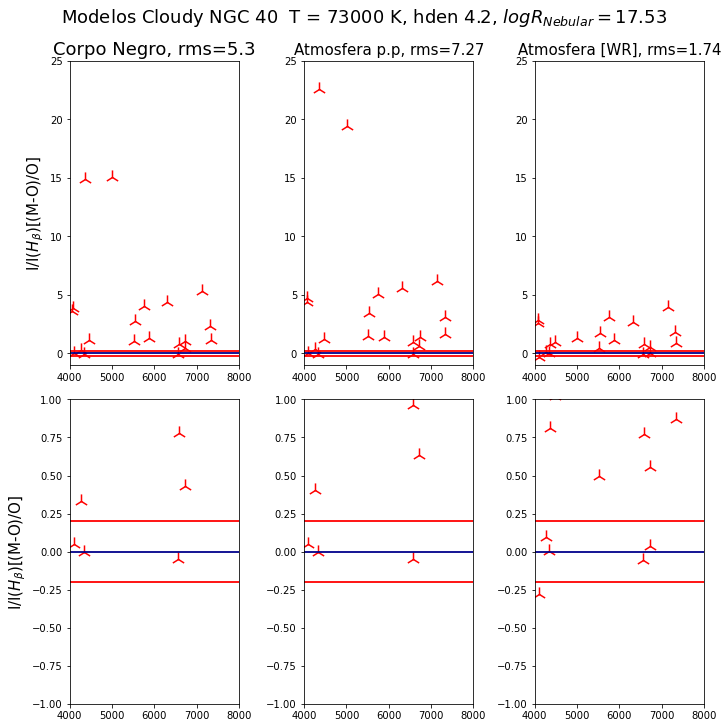

In [28]:
fig, ((ax1,ax2,ax3),(ax4,ax5,ax6)) = plt.subplots(2, 3,figsize=(10,10),constrained_layout=True)
fig.suptitle('Modelos Cloudy NGC 40  T = 73000 K, hden 4.2, $logR_{Nebular} = 17.53$', fontsize=18, color='black')
#gráfico 1

#parte superior 
ax1.scatter(x,y2,marker=('2'), color= 'red',s =200)
ax2.scatter(x,z2,marker=('2'), color= 'red',s=200)
ax3.scatter(x,w2,marker=('2'), color= 'red',s=200)
#------------------------------------------------------------
ax1.set_ylabel('I/I($H_{\u03B2}$)[(M-O)/O]', fontsize = 15)
ax1.set_title('Corpo Negro, rms=5.3', fontsize = 18) #título
ax1.axhline(y=0, color='darkblue', linewidth= 1.8)# linha horizontal
ax1.axhline(y=0.2, color='red', linewidth= 1.8)# linha horizontal
ax1.axhline(y=-0.2, color='red', linewidth= 1.8)# linha horizontal
#---------------------------------------------------------------
ax2.set_title('Atmosfera p.p, rms=7.27', fontsize = 15) #título
ax2.axhline(y=0, color='darkblue', linewidth= 1.8)# linha horizontal
ax2.axhline(y=0.2, color='red', linewidth= 1.8)# linha horizontal
ax2.axhline(y=-0.2, color='red', linewidth= 1.8)# linha horizontal
#-------------------------------------------------------------
ax3.set_title('Atmosfera [WR], rms=1.74', fontsize = 15) #título
ax3.axhline(y=0, color='darkblue', linewidth= 1.8)# linha horizontal
ax3.axhline(y=0.2, color='red', linewidth= 1.8)# linha horizontal
ax3.axhline(y=-0.2, color='red', linewidth= 1.8)# linha horizontal



#parte inferior 
ax4.scatter(x,y2,marker=('2'), color= 'red',s =200)
ax5.scatter(x,z2,marker=('2'), color= 'red',s=200)
ax6.scatter(x,w2,marker=('2'), color= 'red',s=200)
#------------------------------------------------------------
ax4.set_ylabel('I/I($H_{\u03B2}$)[(M-O)/O]', fontsize = 15)
ax4.axhline(y=0, color='darkblue', linewidth= 1.8)# linha horizontal
ax4.axhline(y=0.2, color='red', linewidth= 1.8)# linha horizontal
ax4.axhline(y=-0.2, color='red', linewidth= 1.8)# linha horizontal
#---------------------------------------------------------------
ax5.axhline(y=0, color='darkblue', linewidth= 1.8)# linha horizontal
ax5.axhline(y=0.2, color='red', linewidth= 1.8)# linha horizontal
ax5.axhline(y=-0.2, color='red', linewidth= 1.8)# linha horizontal
#-------------------------------------------------------------
ax6.axhline(y=0, color='darkblue', linewidth= 1.8)# linha horizontal
ax6.axhline(y=0.2, color='red', linewidth= 1.8)# linha horizontal
ax6.axhline(y=-0.2, color='red', linewidth= 1.8)# linha horizontal


ax1.axis([4000,8000,-1,25]) #escala maior disc
ax2.axis([4000,8000,-1,25]) #escala maior disc
ax3.axis([4000,8000,-1,25]) #escala maior disc
ax4.axis([4000,8000,-1,1]) 
ax5.axis([4000,8000,-1,1])
ax6.axis([4000,8000,-1,1]) 
 
plt.savefig('RMS_comparativo_hden42.png')
plt.show()

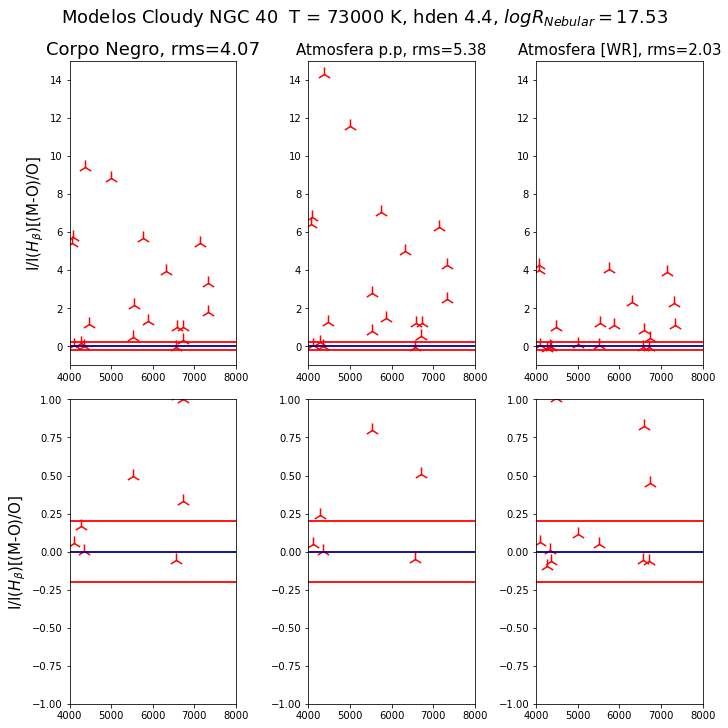

In [29]:
fig, ((ax1,ax2,ax3),(ax4,ax5,ax6)) = plt.subplots(2, 3,figsize=(10,10),constrained_layout=True)
fig.suptitle('Modelos Cloudy NGC 40  T = 73000 K, hden 4.4, $logR_{Nebular} = 17.53$', fontsize=18, color='black')
#gráfico 1

#parte superior 
ax1.scatter(x,y3,marker=('2'), color= 'red',s =200)
ax2.scatter(x,z3,marker=('2'), color= 'red',s=200)
ax3.scatter(x,w3,marker=('2'), color= 'red',s=200)
#------------------------------------------------------------
ax1.set_ylabel('I/I($H_{\u03B2}$)[(M-O)/O]', fontsize = 15)
ax1.set_title('Corpo Negro, rms=4.07', fontsize = 18) #título
ax1.axhline(y=0, color='darkblue', linewidth= 1.8)# linha horizontal
ax1.axhline(y=0.2, color='red', linewidth= 1.8)# linha horizontal
ax1.axhline(y=-0.2, color='red', linewidth= 1.8)# linha horizontal
#---------------------------------------------------------------
ax2.set_title('Atmosfera p.p, rms=5.38', fontsize = 15) #título
ax2.axhline(y=0, color='darkblue', linewidth= 1.8)# linha horizontal
ax2.axhline(y=0.2, color='red', linewidth= 1.8)# linha horizontal
ax2.axhline(y=-0.2, color='red', linewidth= 1.8)# linha horizontal
#-------------------------------------------------------------
ax3.set_title('Atmosfera [WR], rms=2.03', fontsize = 15) #título
ax3.axhline(y=0, color='darkblue', linewidth= 1.8)# linha horizontal
ax3.axhline(y=0.2, color='red', linewidth= 1.8)# linha horizontal
ax3.axhline(y=-0.2, color='red', linewidth= 1.8)# linha horizontal



#parte inferior 
ax4.scatter(x,y3,marker=('2'), color= 'red',s =200)
ax5.scatter(x,z3,marker=('2'), color= 'red',s=200)
ax6.scatter(x,w3,marker=('2'), color= 'red',s=200)
#------------------------------------------------------------
ax4.set_ylabel('I/I($H_{\u03B2}$)[(M-O)/O]', fontsize = 15)
ax4.axhline(y=0, color='darkblue', linewidth= 1.8)# linha horizontal
ax4.axhline(y=0.2, color='red', linewidth= 1.8)# linha horizontal
ax4.axhline(y=-0.2, color='red', linewidth= 1.8)# linha horizontal
#---------------------------------------------------------------
ax5.axhline(y=0, color='darkblue', linewidth= 1.8)# linha horizontal
ax5.axhline(y=0.2, color='red', linewidth= 1.8)# linha horizontal
ax5.axhline(y=-0.2, color='red', linewidth= 1.8)# linha horizontal
#-------------------------------------------------------------
ax6.axhline(y=0, color='darkblue', linewidth= 1.8)# linha horizontal
ax6.axhline(y=0.2, color='red', linewidth= 1.8)# linha horizontal
ax6.axhline(y=-0.2, color='red', linewidth= 1.8)# linha horizontal


ax1.axis([4000,8000,-1,15]) #escala maior disc
ax2.axis([4000,8000,-1,15]) #escala maior disc
ax3.axis([4000,8000,-1,15]) #escala maior disc
ax4.axis([4000,8000,-1,1]) 
ax5.axis([4000,8000,-1,1])
ax6.axis([4000,8000,-1,1]) 
 
plt.savefig('RMS_comparativo_hden44.png')
plt.show()